In [16]:
library(forecast)

In [27]:
data <- read.csv("../../data/potency/canela1.csv",col.names = c("timestamp","potency"),header = F)
data_len <- length(data[,2])
train_len <- as.integer(0.8*data_len)

train <- data[1:train_len,2]
test_len <- data_len - train_len
test <- data[train_len+1:test_len,2]

In [30]:
test_len

[1] 12528

In [29]:
start.time <- Sys.time()
model <- Arima(data$potency, order = c(1,1,1))
end.time <- Sys.time()
end.time-start.time

Time difference of 1.048644 secs

In [9]:
data <- train
params <- c(3,1,3)
y_test  <- c()
y_approx <- c()
for(i in 1:(test_len-12)){
    print(paste("Training ",i))
    p <- predict(model,n.ahead = 12)
    
    y_approx <- rbind(y_approx, p$pred)
    y_test <- rbind(y_test,test[seq(i+1,i+12)])
    data <- c(data,test[i])
    if(i == 10){
        break
    }
    model <-Arima(data, model = model)
}

[1] "Training  1"
[1] "Training  2"
[1] "Training  3"
[1] "Training  4"
[1] "Training  5"
[1] "Training  6"
[1] "Training  7"
[1] "Training  8"
[1] "Training  9"
[1] "Training  10"


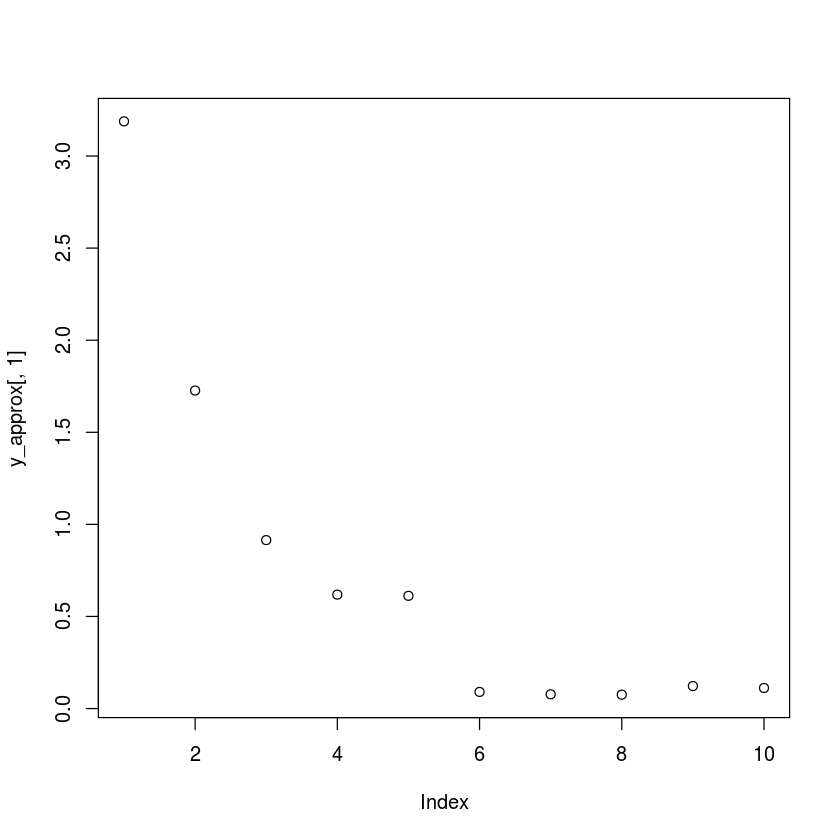

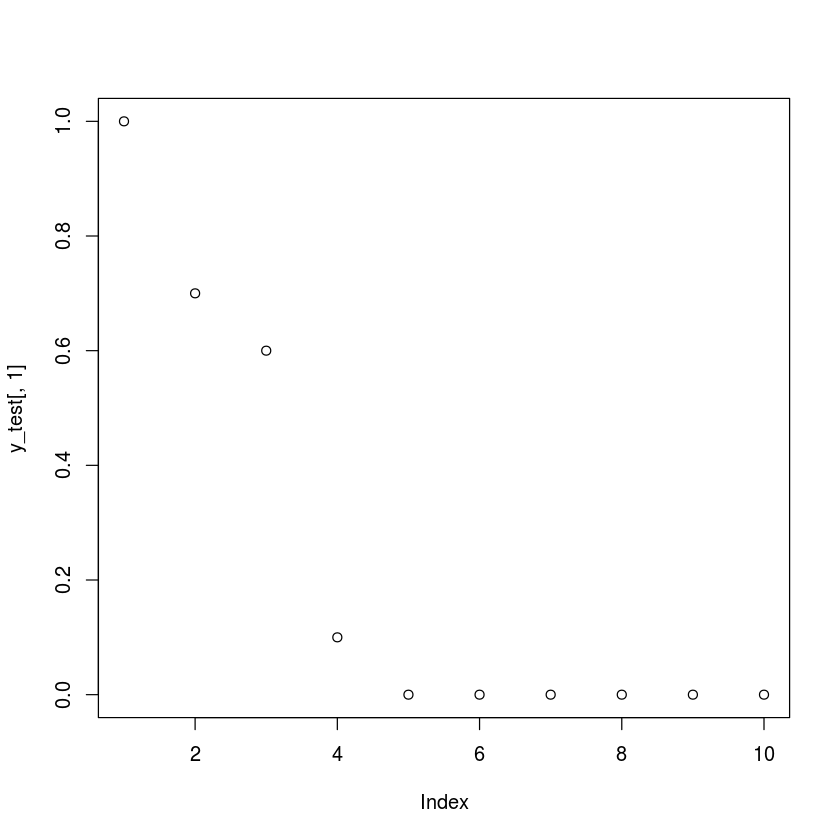

In [14]:
plot(y_approx[,1])
plot(y_test[,1])

In [ ]:
write.csv(y_test,"y_test.csv", row.names= FALSE)
write.csv(y_approx,"y_approx.csv", row.names=F)